In [3]:
import networkx as nx
import os, sys
import matplotlib.pyplot as plt
import random
import pandas as pd
import json

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from simulation import Simulation

In [8]:
import math
from networkx.generators import newman_watts_strogatz_graph
import os
import time
import re
import pickle


def generate_tree(n, b):
    """
    Generates a tree graph with n nodes and branching factor b.
    
    Parameters:
    - n: Total number of nodes.
    - b: Branching factor.

    Returns:
    - G: A networkx graph.
    """
    if n < 1:
        raise ValueError("The number of nodes, n, should be at least 1.")
    if b < 1:
        raise ValueError("The branching factor, b, should be at least 1.")

    G = nx.Graph()
    node_counter = 1
    queue = [(0, 0)]  # (node, depth)
    
    while queue and node_counter < n:
        current_node, depth = queue.pop(0)
        for i in range(b):
            if node_counter >= n:
                break
            child_node = node_counter
            G.add_edge(current_node, child_node)
            queue.append((child_node, depth + 1))
            node_counter += 1

    return G

# Graph creation
def create_graph_with_average_degree(n, desired_avg_degree):
    # Calculate the total number of edges needed to achieve the desired average degree
    total_edges_needed = math.ceil((desired_avg_degree * n) / 2)
    
    # Start with a base connected graph, e.g., a path graph
    G = nx.path_graph(n)
    current_edges = n - 1  # Path graph has n-1 edges

    # Add additional edges to reach the desired total number of edges
    while current_edges < total_edges_needed:
        u, v = random.sample(range(n), 2)  # Choose two distinct nodes at random
        if not G.has_edge(u, v):
            G.add_edge(u, v)  # Add the new edge to the graph
            current_edges += 1

    return G


def build_small_world(n=100,k=4,p=.3):
    return newman_watts_strogatz_graph(n, k, p, seed=0)


def parse_file_name(file,prefix="degree_test"):
    m = re.match(rf"{prefix}_([0-9]*\.[0-9]+)_([0-9]*\.[0-9]+)_.*", file)
    alpha = float(m.group(1))
    p = float(m.group(2))
    return alpha,p

def read_file(path):
    with open(f"./data/{path}/results.pkl","rb") as f:
        data = pickle.load(f)
    np_data = np.array([tuple(d.values()) for d in data])
    df = pd.DataFrame(np_data,columns = list(data[0].keys()))
    df['adopted'] = df['adopted'].astype(int) 
    return df


def get_50_adoption(path,prefix):
    alpha,p = parse_file_name(path,prefix)
    result = {"alpha":alpha,"p":p}
    df = read_file(path)
    df = df.groupby(["Trial","timestep","story_item"])['adopted'].mean().reset_index()
    df = df.groupby(['timestep']).mean("adopted").reset_index()
    df = df[df.adopted > .5]
    if df.shape[0] == 0:
        result['timestep'] = None
    else:
        result['timestep'] = min(df.timestep)
    return result

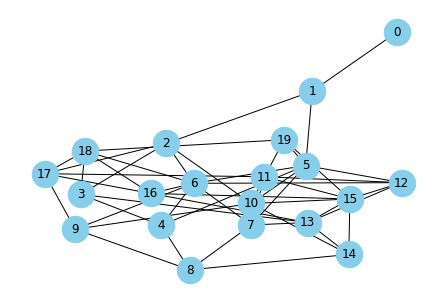

In [12]:
G = create_graph_with_average_degree(20,5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='k')

# Step 4: Show plot
plt.show()


## Alpha vs. Social Network Diameter

In [6]:
import numpy as np

story_graph = generate_tree(20,2)

for p in np.linspace(0,1,10):
    for alpha in np.linspace(.05,1,10):
        graph = build_small_world(n=50,p=p)
        stub = f"sw2_test_{alpha:.2f}_{p:.2f}"
        params = {"alpha":alpha,"filestub":stub}
        sim = Simulation(story_graph=story_graph,params=params,social_graph=graph,config_path="../config/simulation.properties")
        sim.run(30)

Story nodes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Release time  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Running 30 trials.
..............................Saving
Story nodes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Release time  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Running 30 trials.
..............................Saving
Story nodes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Release time  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Running 30 trials.
..............................Saving
Story nodes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Release time  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Running 30 trials.
..............................Saving
Story nodes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Release time  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [9]:
import os
import time
results = []
for path in os.listdir("./data"):
    if path.startswith('sw2_test'):
        start = time.time()
        print(f"Processing {path} ...",end="")
        results.append(get_50_adoption(path,"sw2_test"))
        print(f"done ({(time.time() - start):.2f} seconds)")


Processing sw2_test_0.05_0.33_20240228163032 ...done (8.01 seconds)
Processing sw2_test_1.00_0.00_20240228162031 ...done (6.46 seconds)
Processing sw2_test_0.37_0.11_20240228162248 ...done (7.14 seconds)
Processing sw2_test_1.00_0.44_20240228163840 ...done (7.67 seconds)
Processing sw2_test_0.68_0.22_20240228162842 ...done (7.24 seconds)
Processing sw2_test_0.26_0.22_20240228162701 ...done (7.12 seconds)
Processing sw2_test_0.68_0.44_20240228163715 ...done (4.92 seconds)
Processing sw2_test_0.89_0.67_20240228164605 ...done (5.67 seconds)
Processing sw2_test_0.16_0.33_20240228163101 ...done (5.76 seconds)
Processing sw2_test_0.47_1.00_20240228165536 ...done (4.38 seconds)
Processing sw2_test_0.89_0.00_20240228162003 ...done (6.25 seconds)
Processing sw2_test_0.26_0.67_20240228164353 ...done (4.69 seconds)
Processing sw2_test_0.79_0.56_20240228164147 ...done (4.99 seconds)
Processing sw2_test_0.16_0.89_20240228165108 ...done (4.65 seconds)
Processing sw2_test_0.79_0.44_20240228163738 ...

In [11]:
sw2_test = pd.DataFrame(results)
sw2_test.to_csv("sw2_test.csv")

/Users/jeintron/.pyenv/versions/3.9.1/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


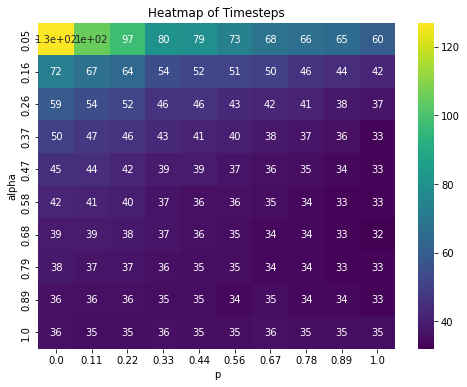

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
pivot_df = sw2_test.pivot("alpha", "p", "timestep")

# Use Seaborn to create the heatmap
plt.figure(figsize=(8, 6))  # Optional: Adjusts the size of the heatmap
sns.heatmap(pivot_df, annot=True, cmap="viridis")  # 'annot=True' to annotate cells with their values
plt.title("Heatmap of Timesteps")
plt.show()

## Story graph degree vs. alpha

In [3]:
import numpy as np


for degree in np.linspace(1,10,10):
    for alpha in np.linspace(.1,1,10):
        story_graph = create_graph_with_average_degree(20,degree)
        graph = build_small_world(n=50,p=.3)
        stub = f"degree_test_{degree:.2f}_{alpha:.2f}"
        params = {"alpha":alpha,"filestub":stub}
        sim = Simulation(story_graph=story_graph,params=params,social_graph=graph,config_path="../config/simulation.properties")
        sim.run(30)

Story nodes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Release time  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Running 30 trials.
..............................Saving
Story nodes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Release time  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Running 30 trials.
..............................Saving
Story nodes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Release time  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Running 30 trials.
..............................Saving
Story nodes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Release time  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Running 30 trials.
..............................Saving
Story nodes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Release time  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [4]:
results = []
for path in os.listdir("./data"):
    if path.startswith('degree_test'):
        start = time.time()
        print(f"Processing {path} ...",end="")
        results.append(get_50_adoption(path))
        print(f"done ({(time.time() - start):.2f} seconds)")

Processing degree_test_5.00_1.00_20240225094646 ...done (4.95 seconds)
Processing degree_test_3.00_0.50_20240225093919 ...done (4.78 seconds)
Processing degree_test_1.00_0.30_20240225092837 ...done (5.75 seconds)
Processing degree_test_6.00_1.00_20240225094932 ...done (4.61 seconds)
Processing degree_test_5.00_0.90_20240225094631 ...done (4.31 seconds)
Processing degree_test_9.00_1.00_20240225095717 ...done (4.28 seconds)
Processing degree_test_7.00_0.20_20240225095015 ...done (5.99 seconds)
Processing degree_test_6.00_0.90_20240225094916 ...done (4.58 seconds)
Processing degree_test_6.00_0.80_20240225094902 ...done (4.47 seconds)
Processing degree_test_7.00_0.50_20240225095104 ...done (4.32 seconds)
Processing degree_test_9.00_0.30_20240225095542 ...done (4.83 seconds)
Processing degree_test_9.00_0.90_20240225095704 ...done (4.13 seconds)
Processing degree_test_10.00_0.60_20240225095857 ...done (3.86 seconds)
Processing degree_test_3.00_0.70_20240225093955 ...done (4.60 seconds)
Proce

In [5]:
df = pd.DataFrame(results)
df.columns = ["degree","alpha","timestep"]
df.to_csv("degree_test.csv")

/Users/jeintron/.pyenv/versions/3.9.1/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


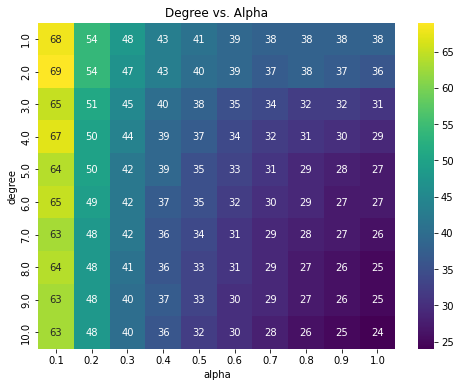

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
pivot_df = df.pivot("degree", "alpha", "timestep")

# Use Seaborn to create the heatmap
plt.figure(figsize=(8, 6))  # Optional: Adjusts the size of the heatmap
sns.heatmap(pivot_df, annot=True, cmap="viridis")  # 'annot=True' to annotate cells with their values
plt.title("Degree vs. Alpha")
plt.show()

In [ ]:
results = []
for path in os.listdir("./data"):
    if path.startswith('degree_test'):
        start = time.time()
        print(f"Processing {path} ...",end="")
        results.append(get_50_adoption(path))
        print(f"done ({(time.time() - start):.2f} seconds)")

In [32]:
file = "degree_test_5.00_0.50_20240225094532"
df = parse_file_name(file)

NameError: name 'parse_file_name' is not defined

In [51]:
def get_whole_adoptions(df):
    df_adoptions = df.groupby(['Trial','agent','timestep'])['adopted'].sum().reset_index()
    df_adoptions['adopted'] = df_adoptions.adopted == 20
    df_adoptions = df_adoptions.groupby(['Trial','timestep'])['adopted'].mean().reset_index()
    df_adoptions = df_adoptions.groupby("timestep")['adopted'].mean().reset_index()
    return df_adoptions

def get_diffusion_curve(deg):
    results = {}
    for path in os.listdir("./data"):
        if path.startswith('degree_test'):
            degree, alpha = parse_file_name(path)
            if (degree == deg):
                start = time.time()
                print(f"Processing {path} ...",end="")
                df = read_file(path)
                results[(alpha)] = get_whole_adoptions(df)
                print(f"done ({(time.time() - start):.2f} seconds)")
    return results


def plot_diffusion_curve(results):
    # 1. Sort the results by alpha values
    sorted_results = dict(sorted(results.items()))

    # 2. Generate colors from a gradient palette
    num_alphas = len(sorted_results)
    colors = plt.cm.viridis(np.linspace(0, 1, num_alphas))

    # Plot each dataframe with a unique color
    for (alpha, df), color in zip(sorted_results.items(), colors):
        plt.plot(df['timestep'], 
                df['adopted'], 
                marker='o', 
                label=f'{alpha}',
                color=color)  # Use the color from the gradient palette

    plt.title('Whole Adoption Ratio Over Time - 20 Story Elements in Small-World Social Network')
    plt.xlabel('Timestep')
    plt.ylabel('Average Whole Adoption Ratio')
    plt.grid(True)
    plt.legend(title="alpha")
    plt.show()

Processing degree_test_2.00_0.20_20240225093333 ...done (6.45 seconds)
Processing degree_test_2.00_0.70_20240225093550 ...done (4.95 seconds)
Processing degree_test_2.00_0.40_20240225093427 ...done (4.90 seconds)
Processing degree_test_2.00_0.80_20240225093621 ...done (5.33 seconds)
Processing degree_test_2.00_0.30_20240225093400 ...done (5.26 seconds)
Processing degree_test_2.00_0.10_20240225093303 ...done (7.02 seconds)
Processing degree_test_2.00_1.00_20240225093726 ...done (6.09 seconds)
Processing degree_test_2.00_0.50_20240225093452 ...done (4.81 seconds)
Processing degree_test_2.00_0.60_20240225093522 ...done (5.06 seconds)
Processing degree_test_2.00_0.90_20240225093654 ...done (5.87 seconds)


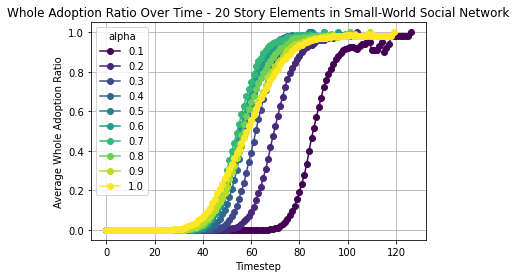

In [52]:
results2 = get_diffusion_curve(2)
plot_diffusion_curve(results2)


Processing degree_test_5.00_1.00_20240225094646 ...done (4.56 seconds)
Processing degree_test_5.00_0.90_20240225094631 ...done (3.98 seconds)
Processing degree_test_5.00_0.60_20240225094547 ...done (3.90 seconds)
Processing degree_test_5.00_0.10_20240225094420 ...done (6.38 seconds)
Processing degree_test_5.00_0.50_20240225094532 ...done (4.00 seconds)
Processing degree_test_5.00_0.20_20240225094440 ...done (5.26 seconds)
Processing degree_test_5.00_0.40_20240225094516 ...done (4.26 seconds)
Processing degree_test_5.00_0.80_20240225094617 ...done (4.04 seconds)
Processing degree_test_5.00_0.70_20240225094602 ...done (4.05 seconds)
Processing degree_test_5.00_0.30_20240225094458 ...done (4.69 seconds)


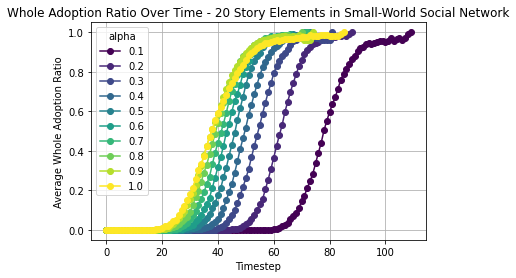

In [53]:
results5 = get_diffusion_curve(5)
plot_diffusion_curve(results5)

Processing degree_test_10.00_0.60_20240225095857 ...done (3.85 seconds)
Processing degree_test_10.00_0.30_20240225095814 ...done (4.49 seconds)
Processing degree_test_10.00_0.10_20240225095737 ...done (6.46 seconds)
Processing degree_test_10.00_0.80_20240225095922 ...done (3.60 seconds)
Processing degree_test_10.00_0.20_20240225095757 ...done (5.08 seconds)
Processing degree_test_10.00_1.00_20240225095946 ...done (3.81 seconds)
Processing degree_test_10.00_0.40_20240225095829 ...done (4.03 seconds)
Processing degree_test_10.00_0.90_20240225095934 ...done (3.65 seconds)
Processing degree_test_10.00_0.50_20240225095842 ...done (3.64 seconds)
Processing degree_test_10.00_0.70_20240225095910 ...done (3.47 seconds)


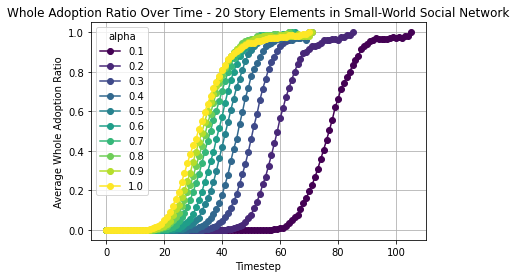

In [54]:
results10 = get_diffusion_curve(10)
plot_diffusion_curve(results10)

In [61]:
full_merge10 = pd.concat([df.assign(alpha = a)  for a,df in results10.items()])

In [63]:
full_merge10.to_csv("adoption_curve_10.csv",index=False)

In [65]:
def merge_results(r,name):
    full = pd.concat([df.assign(alpha = a)  for a,df in r.items()])
    full.to_csv(name,index=False)

merge_results(results5,"adoption_curve_5.csv")
merge_results(results2,"adoption_curve_2.csv")